# ***Regression Analysis - Bike Sharing System***

## PPT Link:https://drive.google.com/file/d/1-J5kBi3YnfN0KkYZk5myg66QPcSp_lhD/view?usp=sharing

In [3]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [4]:
#read.csv - to read csv file in python
df=pd.read_csv('/content/bike data.csv')
df.head(20)

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0         1  01-01-2011       1   0     1   0        0        6           0   
1         2  01-01-2011       1   0     1   1        0        6           0   
2         3  01-01-2011       1   0     1   2        0        6           0   
3         4  01-01-2011       1   0     1   3        0        6           0   
4         5  01-01-2011       1   0     1   4        0        6           0   
5         6  01-01-2011       1   0     1   5        0        6           0   
6         7  01-01-2011       1   0     1   6        0        6           0   
7         8  01-01-2011       1   0     1   7        0        6           0   
8         9  01-01-2011       1   0     1   8        0        6           0   
9        10  01-01-2011       1   0     1   9        0        6           0   
10       11  01-01-2011       1   0     1  10        0        6           0   
11       12  01-01-2011       1   0     1  11        0        6           0   
12       13  01-01-2011       1   0     1  12        0        6           0   
13       14  01-01-2011       1   0     1  13        0        6           0   
14       15  01-01-2011       1   0     1  14        0        6           0   
15       16  01-01-2011       1   0     1  15        0        6           0   
16       17  01-01-2011       1   0     1  16        0        6           0   
17       18  01-01-2011       1   0     1  17        0        6           0   
18       19  01-01-2011       1   0     1  18        0        6           0   
19       20  01-01-2011       1   0     1  19        0        6           0   

    weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0            1  0.24  0.2879  0.81     0.0000       3          13   16  
1            1  0.22  0.2727  0.80     0.0000       8          32   40  
2            1  0.22  0.2727  0.80     0.0000       5          27   32  
3            1  0.24  0.2879  0.75     0.0000       3          10   13  
4            1  0.24  0.2879  0.75     0.0000       0           1    1  
5            2  0.24  0.2576  0.75     0.0896       0           1    1  
6            1  0.22  0.2727  0.80     0.0000       2           0    2  
7            1  0.20  0.2576  0.86     0.0000       1           2    3  
8            1  0.24  0.2879  0.75     0.0000       1           7    8  
9            1  0.32  0.3485  0.76     0.0000       8           6   14  
10           1  0.38  0.3939  0.76     0.2537      12          24   36  
11           1  0.36  0.3333  0.81     0.2836      26          30   56  
12           1  0.42  0.4242  0.77     0.2836      29          55   84  
13           2  0.46  0.4545  0.72     0.2985      47          47   94  
14           2  0.46  0.4545  0.72     0.2836      35          71  106  
15           2  0.44  0.4394  0.77     0.2985      40          70  110  
16           2  0.42  0.4242  0.82     0.2985      41          52   93  
17           2  0.44  0.4394  0.82     0.2836      15          52   67  
18           3  0.42  0.4242  0.88     0.2537       9          26   35  
19           3  0.42  0.4242  0.88     0.2537       6          31   37

# ***Data Preprocessing***

In [5]:
#Shape-used to know the dimensions of dataframe
df.shape


(17379, 17)

In [6]:
#Checking for the  NaN values
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
#Checking for the missing values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
#info() - used to get a concise summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
# Iterate through all columns in the DataFrame
for column in df.columns:
    # Extract unique values for each column
    unique_values = df[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in instant: [    1     2     3 ... 17377 17378 17379]
Unique values in dteday: ['01-01-2011' '01-02-2011' '01-03-2011' '01-04-2011' '01-05-2011'
 '01-06-2011' '01-07-2011' '01-08-2011' '01-09-2011' '01-10-2011'
 '01-11-2011' '01-12-2011' '1/13/2011' '1/14/2011' '1/15/2011' '1/16/2011'
 '1/17/2011' '1/18/2011' '1/19/2011' '1/20/2011' '1/21/2011' '1/22/2011'
 '1/23/2011' '1/24/2011' '1/25/2011' '1/26/2011' '1/27/2011' '1/28/2011'
 '1/29/2011' '1/30/2011' '1/31/2011' '02-01-2011' '02-02-2011'
 '02-03-2011' '02-04-2011' '02-05-2011' '02-06-2011' '02-07-2011'
 '02-08-2011' '02-09-2011' '02-10-2011' '02-11-2011' '02-12-2011'
 '2/13/2011' '2/14/2011' '2/15/2011' '2/16/2011' '2/17/2011' '2/18/2011'
 '2/19/2011' '2/20/2011' '2/21/2011' '2/22/2011' '2/23/2011' '2/24/2011'
 '2/25/2011' '2/26/2011' '2/27/2011' '2/28/2011' '03-01-2011' '03-02-2011'
 '03-03-2011' '03-04-2011' '03-05-2011' '03-06-2011' '03-07-2011'
 '03-08-2011' '03-09-2011' '03-10-2011' '03-11-2011' '03-12-2011'
 '3/13

In [10]:
#describe() - used to calculate statistial data of the numerical values of dataframe
df.describe()

instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.192556   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.340000   
50%        0.000000      3.000000      1.000000      1.000000      0.500000   
75%        0.000000      5.000000      1.000000      2.000000      0.660000   
max        1.000000      6.000000      1.000000      4.000000      1.000000   

              atemp           hum     windspeed        casual    registered  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.475775      0.627229      0.190098     35.676218    153.786869   
std        0.171850      0.192930      0.122340     49.305030    151.357286   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.333300      0.480000      0.104500      4.000000     34.000000   
50%        0.484800      0.630000      0.194000     17.000000    115.000000   
75%        0.621200      0.780000      0.253700     48.000000    220.000000   
max        1.000000      1.000000      0.850700    367.000000    886.000000   

                cnt  
count  17379.000000  
mean     189.463088  
std      181.387599  
min        1.000000  
25%       40.000000  
50%      142.000000  
75%      281.000000  
max      977.000000

In [11]:
#Checking for the duplicate values
df.duplicated().sum()

0

# ***Feature Engineering -Binning***

Here ,we divide the range of values of numerical variables into a set of intervals or bins and then assign a categorical label to each bin,so that we can create plots/graphs.

In [12]:
df['season'] = pd.cut(df['season'], bins=4, labels=['winter', 'spring', 'summer', 'fall'])
df.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  01-01-2011  winter   0     1   0        0        6           0   
1        2  01-01-2011  winter   0     1   1        0        6           0   
2        3  01-01-2011  winter   0     1   2        0        6           0   
3        4  01-01-2011  winter   0     1   3        0        6           0   
4        5  01-01-2011  winter   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

In [13]:
df['yr']=pd.cut(df['yr'],bins=2,labels=['2011','2012'])
df.head()

instant      dteday  season    yr  mnth  hr  holiday  weekday  workingday  \
0        1  01-01-2011  winter  2011     1   0        0        6           0   
1        2  01-01-2011  winter  2011     1   1        0        6           0   
2        3  01-01-2011  winter  2011     1   2        0        6           0   
3        4  01-01-2011  winter  2011     1   3        0        6           0   
4        5  01-01-2011  winter  2011     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

In [14]:
df['mnth']=pd.cut(df['mnth'],bins=12,labels=['January','Febuary','March','April','May','june','July','August','September','October','November','December'])
df.head()

instant      dteday  season    yr     mnth  hr  holiday  weekday  \
0        1  01-01-2011  winter  2011  January   0        0        6   
1        2  01-01-2011  winter  2011  January   1        0        6   
2        3  01-01-2011  winter  2011  January   2        0        6   
3        4  01-01-2011  winter  2011  January   3        0        6   
4        5  01-01-2011  winter  2011  January   4        0        6   

   workingday  weathersit  temp   atemp   hum  windspeed  casual  registered  \
0           0           1  0.24  0.2879  0.81        0.0       3          13   
1           0           1  0.22  0.2727  0.80        0.0       8          32   
2           0           1  0.22  0.2727  0.80        0.0       5          27   
3           0           1  0.24  0.2879  0.75        0.0       3          10   
4           0           1  0.24  0.2879  0.75        0.0       0           1   

   cnt  
0   16  
1   40  
2   32  
3   13  
4    1

In [15]:
df['holiday']=pd.cut(df['holiday'],bins=2,labels=['Not a holiday','Holiday'])
df.head()

instant      dteday  season    yr     mnth  hr        holiday  weekday  \
0        1  01-01-2011  winter  2011  January   0  Not a holiday        6   
1        2  01-01-2011  winter  2011  January   1  Not a holiday        6   
2        3  01-01-2011  winter  2011  January   2  Not a holiday        6   
3        4  01-01-2011  winter  2011  January   3  Not a holiday        6   
4        5  01-01-2011  winter  2011  January   4  Not a holiday        6   

   workingday  weathersit  temp   atemp   hum  windspeed  casual  registered  \
0           0           1  0.24  0.2879  0.81        0.0       3          13   
1           0           1  0.22  0.2727  0.80        0.0       8          32   
2           0           1  0.22  0.2727  0.80        0.0       5          27   
3           0           1  0.24  0.2879  0.75        0.0       3          10   
4           0           1  0.24  0.2879  0.75        0.0       0           1   

   cnt  
0   16  
1   40  
2   32  
3   13  
4    1

In [16]:
df['weathersit'] = pd.cut(df['weathersit'], bins=4, labels=['Clear', 'Mist', 'Light Snow', 'Heavy Rain'])
df.head()

instant      dteday  season    yr     mnth  hr        holiday  weekday  \
0        1  01-01-2011  winter  2011  January   0  Not a holiday        6   
1        2  01-01-2011  winter  2011  January   1  Not a holiday        6   
2        3  01-01-2011  winter  2011  January   2  Not a holiday        6   
3        4  01-01-2011  winter  2011  January   3  Not a holiday        6   
4        5  01-01-2011  winter  2011  January   4  Not a holiday        6   

   workingday weathersit  temp   atemp   hum  windspeed  casual  registered  \
0           0      Clear  0.24  0.2879  0.81        0.0       3          13   
1           0      Clear  0.22  0.2727  0.80        0.0       8          32   
2           0      Clear  0.22  0.2727  0.80        0.0       5          27   
3           0      Clear  0.24  0.2879  0.75        0.0       3          10   
4           0      Clear  0.24  0.2879  0.75        0.0       0           1   

   cnt  
0   16  
1   40  
2   32  
3   13  
4    1

In [17]:
df['workingday']=pd.cut(df['workingday'],bins=2,labels=['Holiday/Weekend','Working day'])
df.head()

instant      dteday  season    yr     mnth  hr        holiday  weekday  \
0        1  01-01-2011  winter  2011  January   0  Not a holiday        6   
1        2  01-01-2011  winter  2011  January   1  Not a holiday        6   
2        3  01-01-2011  winter  2011  January   2  Not a holiday        6   
3        4  01-01-2011  winter  2011  January   3  Not a holiday        6   
4        5  01-01-2011  winter  2011  January   4  Not a holiday        6   

        workingday weathersit  temp   atemp   hum  windspeed  casual  \
0  Holiday/Weekend      Clear  0.24  0.2879  0.81        0.0       3   
1  Holiday/Weekend      Clear  0.22  0.2727  0.80        0.0       8   
2  Holiday/Weekend      Clear  0.22  0.2727  0.80        0.0       5   
3  Holiday/Weekend      Clear  0.24  0.2879  0.75        0.0       3   
4  Holiday/Weekend      Clear  0.24  0.2879  0.75        0.0       0   

   registered  cnt  
0          13   16  
1          32   40  
2          27   32  
3          10   13  
4           1    1

In [18]:
df['weekday']=pd.cut( df['weekday'],bins=7,labels=['sunday','monday','tuesday','wednesday','thursday','friday','saturday'])
df.head()

instant      dteday  season    yr     mnth  hr        holiday   weekday  \
0        1  01-01-2011  winter  2011  January   0  Not a holiday  saturday   
1        2  01-01-2011  winter  2011  January   1  Not a holiday  saturday   
2        3  01-01-2011  winter  2011  January   2  Not a holiday  saturday   
3        4  01-01-2011  winter  2011  January   3  Not a holiday  saturday   
4        5  01-01-2011  winter  2011  January   4  Not a holiday  saturday   

        workingday weathersit  temp   atemp   hum  windspeed  casual  \
0  Holiday/Weekend      Clear  0.24  0.2879  0.81        0.0       3   
1  Holiday/Weekend      Clear  0.22  0.2727  0.80        0.0       8   
2  Holiday/Weekend      Clear  0.22  0.2727  0.80        0.0       5   
3  Holiday/Weekend      Clear  0.24  0.2879  0.75        0.0       3   
4  Holiday/Weekend      Clear  0.24  0.2879  0.75        0.0       0   

   registered  cnt  
0          13   16  
1          32   40  
2          27   32  
3          10   13  
4           1    1

In [19]:
df

instant      dteday  season    yr      mnth  hr        holiday  \
0            1  01-01-2011  winter  2011   January   0  Not a holiday   
1            2  01-01-2011  winter  2011   January   1  Not a holiday   
2            3  01-01-2011  winter  2011   January   2  Not a holiday   
3            4  01-01-2011  winter  2011   January   3  Not a holiday   
4            5  01-01-2011  winter  2011   January   4  Not a holiday   
...        ...         ...     ...   ...       ...  ..            ...   
17374    17375  12/31/2012  winter  2012  December  19  Not a holiday   
17375    17376  12/31/2012  winter  2012  December  20  Not a holiday   
17376    17377  12/31/2012  winter  2012  December  21  Not a holiday   
17377    17378  12/31/2012  winter  2012  December  22  Not a holiday   
17378    17379  12/31/2012  winter  2012  December  23  Not a holiday   

        weekday       workingday weathersit  temp   atemp   hum  windspeed  \
0      saturday  Holiday/Weekend      Clear  0.24  0.2879  0.81     0.0000   
1      saturday  Holiday/Weekend      Clear  0.22  0.2727  0.80     0.0000   
2      saturday  Holiday/Weekend      Clear  0.22  0.2727  0.80     0.0000   
3      saturday  Holiday/Weekend      Clear  0.24  0.2879  0.75     0.0000   
4      saturday  Holiday/Weekend      Clear  0.24  0.2879  0.75     0.0000   
...         ...              ...        ...   ...     ...   ...        ...   
17374    monday      Working day       Mist  0.26  0.2576  0.60     0.1642   
17375    monday      Working day       Mist  0.26  0.2576  0.60     0.1642   
17376    monday      Working day      Clear  0.26  0.2576  0.60     0.1642   
17377    monday      Working day      Clear  0.26  0.2727  0.56     0.1343   
17378    monday      Working day      Clear  0.26  0.2727  0.65     0.1343   

       casual  registered  cnt  
0           3          13   16  
1           8          32   40  
2           5          27   32  
3           3          10   13  
4           0           1    1  
...       ...         ...  ...  
17374      11         108  119  
17375       8          81   89  
17376       7          83   90  
17377      13          48   61  
17378      12          37   49  

[17379 rows x 17 columns]

# ***Exploratory Data Analysis(EDA)***


## **1.**    **Multivariate Analysis**

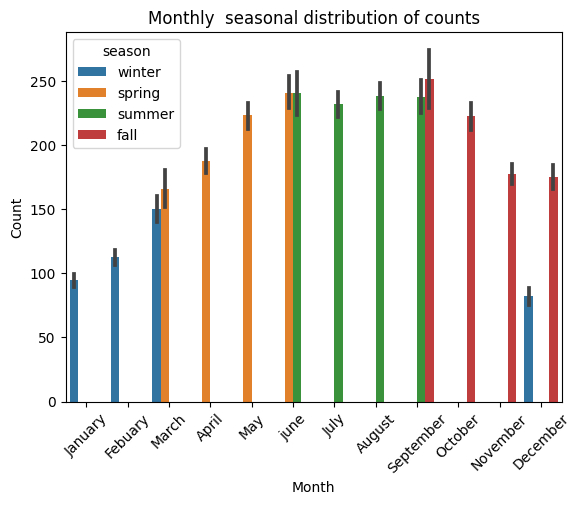

In [20]:
sb.barplot(x='mnth',y='cnt',data=df[['mnth','cnt','season']],hue='season')
plt.xticks(rotation=45)
plt.title('Monthly  seasonal distribution of counts')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

*  The above barplot gives us an idea about the Monthly seasonal distribution of the count of rental bikes tends to seem more during summer.

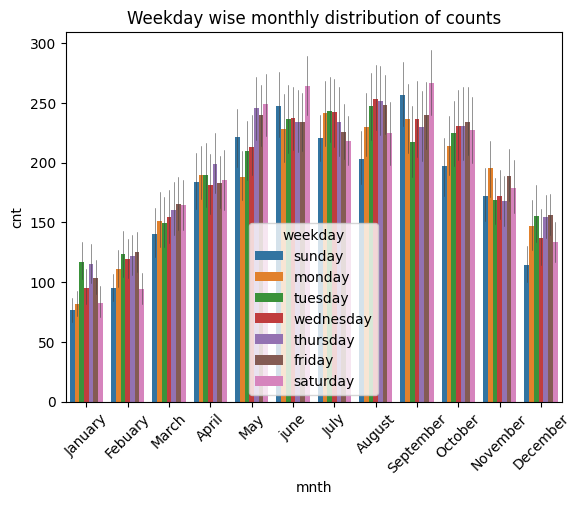

<Figure size 1200x1200 with 0 Axes>

In [21]:
sb.barplot(x='mnth',y='cnt',data=df[['mnth','cnt','weekday']],hue='weekday',errwidth=0.4)
plt.title('Weekday wise monthly distribution of counts')
plt.xticks(rotation=45)
plt.figure(figsize =(12, 12))
plt.show()

*   The above barplot gives us the idea about Weekday wise monthly distribution of count of rental bikes is pretty even from May to September months.

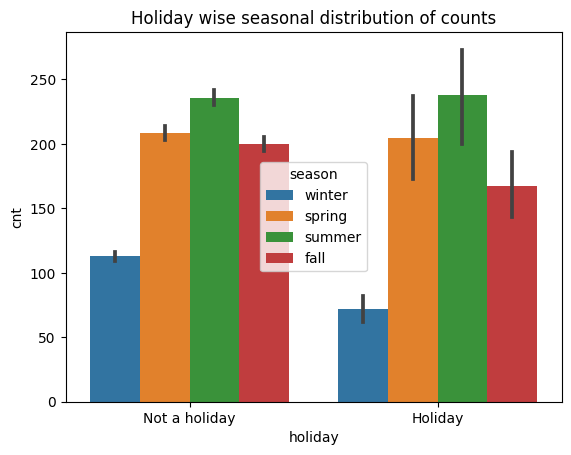

<Figure size 1200x1200 with 0 Axes>

In [22]:
sb.barplot(data=df,x='holiday',y='cnt',hue='season')
plt.title('Holiday wise seasonal distribution of counts')
plt.figure(figsize =(12, 12))
plt.show()

*   The above barplot shows bike rentals are more when there is no holiday and in summer.

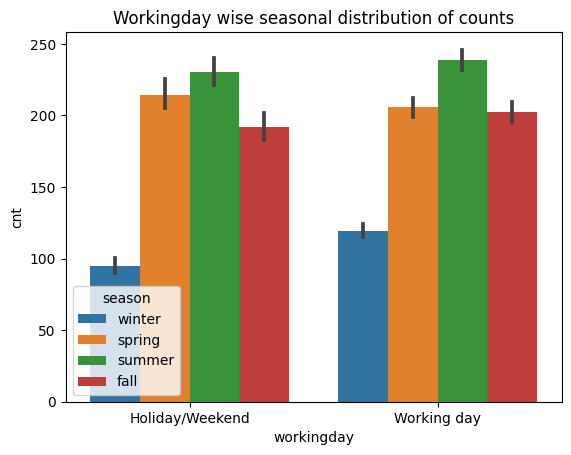

<Figure size 1200x1200 with 0 Axes>

In [23]:
sb.barplot(data=df,x='workingday',y='cnt',hue='season')
plt.title('Workingday wise seasonal distribution of counts')
plt.figure(figsize =(12, 12))
plt.show()

*   The above barplot shows bike rentals are more during working days and in summer ,then in spring.

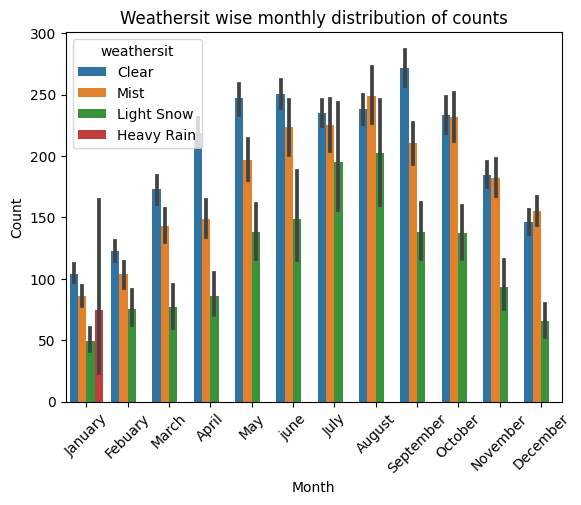

In [24]:
sb.barplot(x='mnth',y='cnt',data=df[['mnth','cnt','weathersit']],hue='weathersit')
plt.xticks(rotation=45)
plt.title('Weathersit wise monthly distribution of counts')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

*   The above barplot gives us an idea about Weather wise monthly distribution of bike rentals are more when the weather is clear.

<ipython-input-25-4b7c4ea3cda2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df.corr(), cmap='inferno', annot=True, cbar=True)


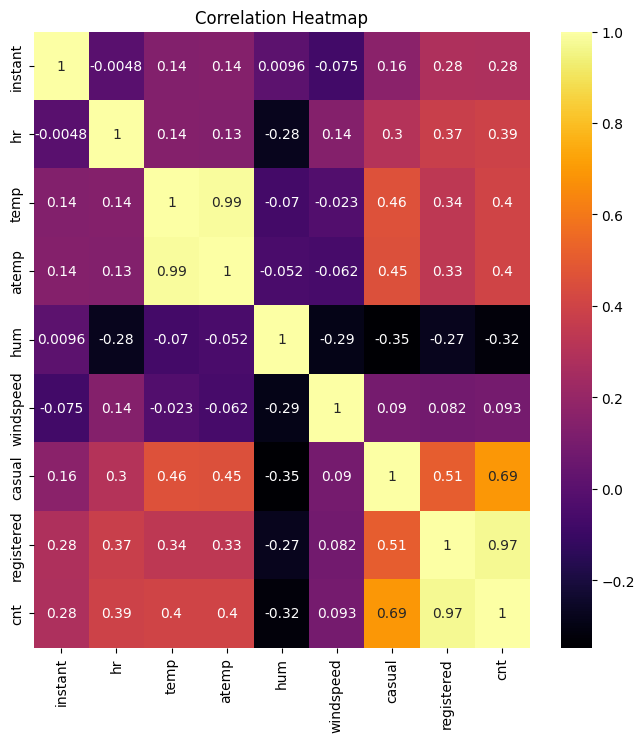

In [25]:
plt.figure(figsize=(8,8))
sb.heatmap(df.corr(), cmap='inferno', annot=True, cbar=True)
plt.title('Correlation Heatmap')
plt.show()

*   Correlation heatmaps are used to analyze the correlation between different variables in a dataset.

Interpreting the heatmap:

*  Values close to 1 indicate a strong positive correlation.
*  Values close to -1 indicate a strong negative correlation.
*   Values close to 0 indicate a weak or no correlation.

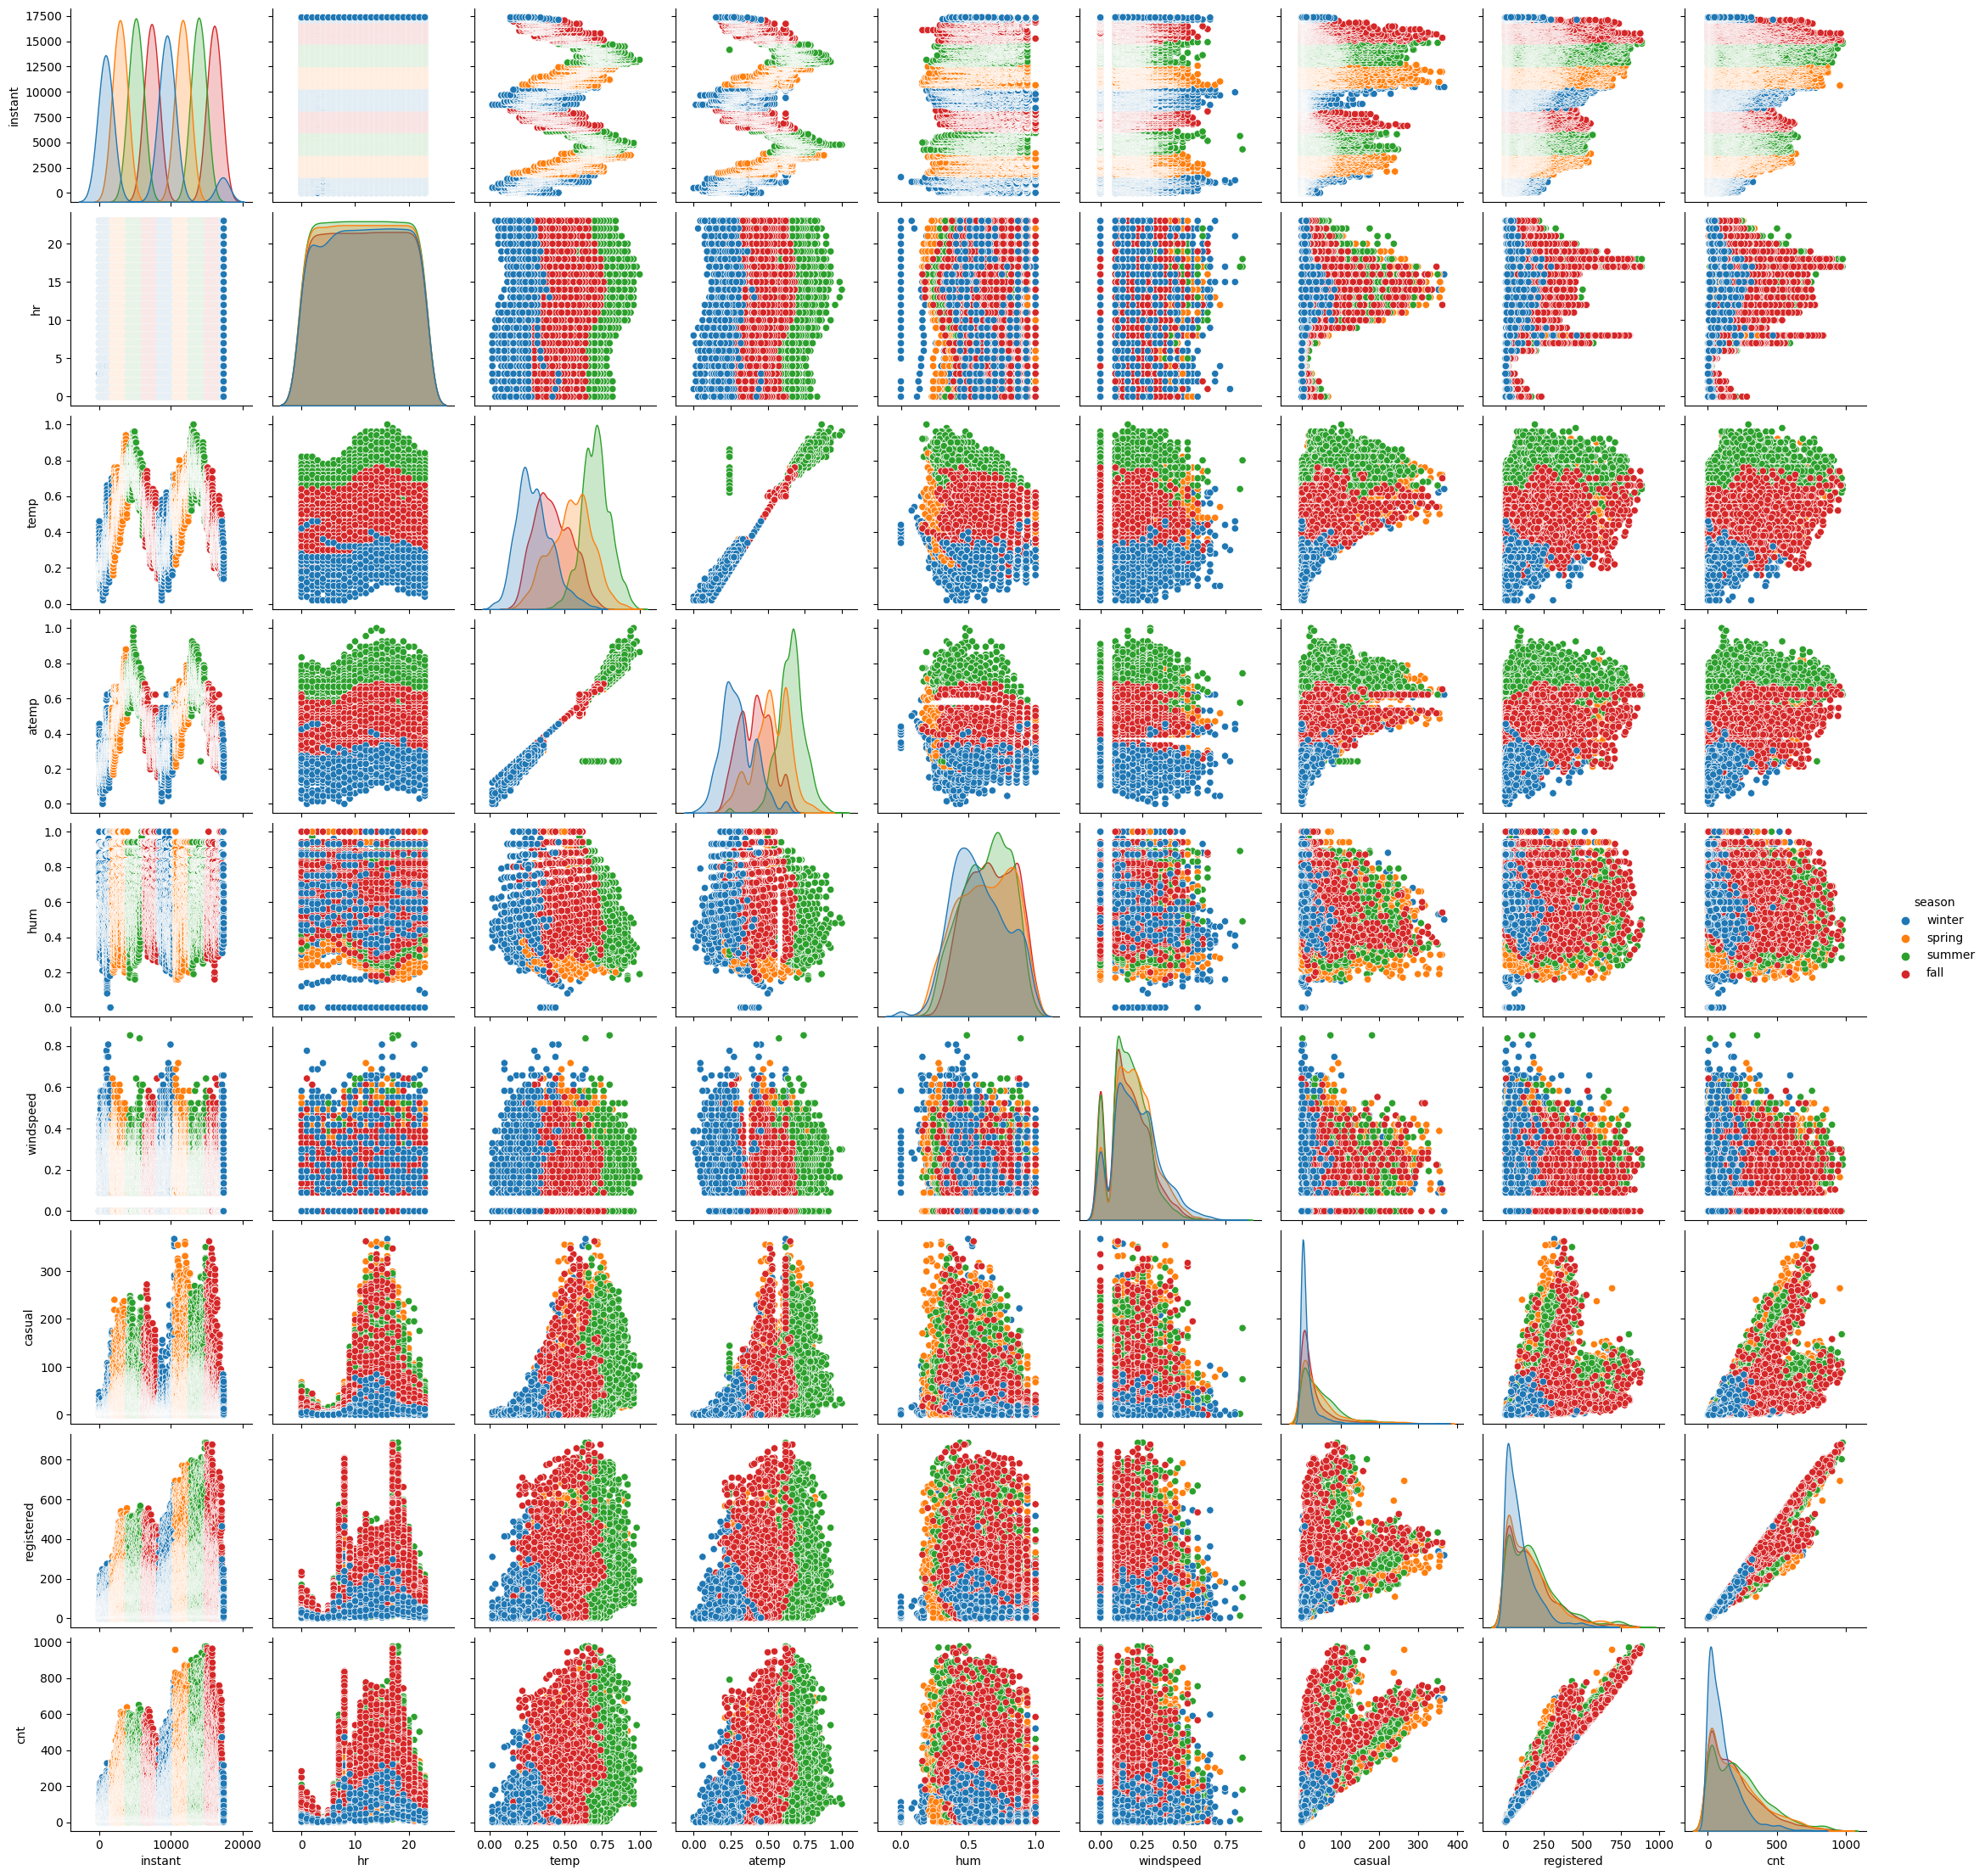

In [26]:
sb.pairplot(df,hue='season')

*   Pairplots are used to analyze the relationship between multiple variables in a dataset.

### **2. Bivariate Analysis.**

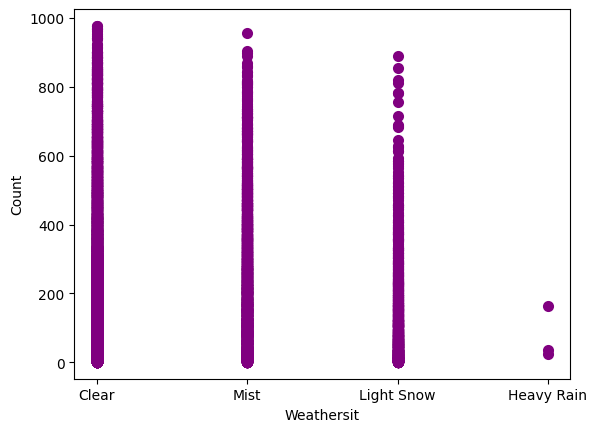

In [27]:
plt.scatter(df['weathersit'], df['cnt'], c ="purple",
            linewidths = 2)
plt.xlabel('Weathersit')
plt.ylabel('Count')
plt.show()

*   The above scatter plot shows that bike rentals are more when the weather is clear with few clouds.

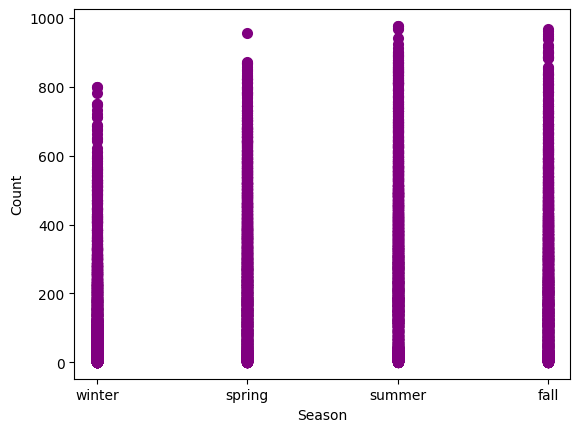

In [28]:
plt.scatter(df['season'], df['cnt'], c ="purple",
            linewidths = 2)
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

*   The above scatter plot shows that bike rentals are more in spring after the summer season.

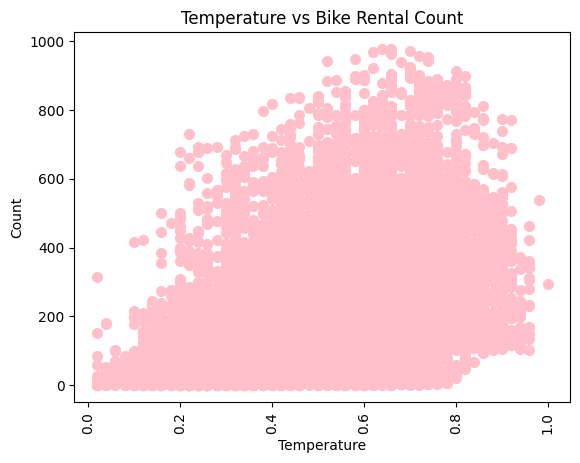

In [29]:
plt.scatter(df['temp'], df['cnt'], c ="pink",
            linewidths = 2)
plt.xticks(rotation=90)
plt.title('Temperature vs Bike Rental Count')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.show()

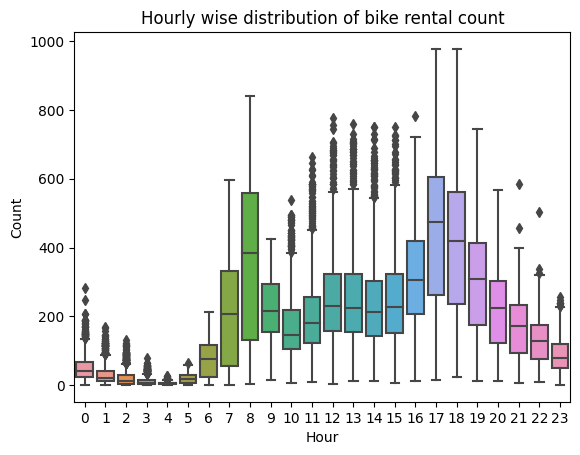

In [30]:
sb.boxplot(x='hr',y='cnt',data=df[['hr','cnt']])
plt.title('Hourly wise distribution of bike rental count')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

*  The above boxplot indicates a peak in the number of bike rentals during the
start and end of working hours.


## **3.Univariate Analysis**

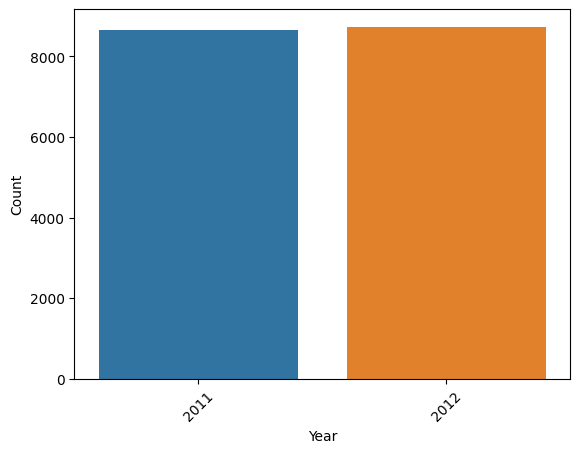

In [31]:
sb.countplot(x=df['yr'],data=df)
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [32]:
yr_2011 = len(df[df['yr'] == '2011'])
print('Count of bike rentals in 2011:',yr_2011)
yr_2012 = len(df[df['yr'] == '2012'])
print('Count of bike rentals in 2012:',yr_2012)

Count of bike rentals in 2011: 8645
Count of bike rentals in 2012: 8734


# ***Dummy Variable Encoding***

In [33]:
a=df.drop(['dteday','instant','weekday','atemp'],axis=1)
x=pd.get_dummies(a,drop_first=True)
print(x)

       hr  temp   hum  windspeed  casual  registered  cnt  season_spring  \
0       0  0.24  0.81     0.0000       3          13   16              0   
1       1  0.22  0.80     0.0000       8          32   40              0   
2       2  0.22  0.80     0.0000       5          27   32              0   
3       3  0.24  0.75     0.0000       3          10   13              0   
4       4  0.24  0.75     0.0000       0           1    1              0   
...    ..   ...   ...        ...     ...         ...  ...            ...   
17374  19  0.26  0.60     0.1642      11         108  119              0   
17375  20  0.26  0.60     0.1642       8          81   89              0   
17376  21  0.26  0.60     0.1642       7          83   90              0   
17377  22  0.26  0.56     0.1343      13          48   61              0   
17378  23  0.26  0.65     0.1343      12          37   49              0   

       season_summer  season_fall  ...  mnth_August  mnth_September  \
0               

In [34]:
df=pd.DataFrame(x)
df.head()

hr  temp   hum  windspeed  casual  registered  cnt  season_spring  \
0   0  0.24  0.81        0.0       3          13   16              0   
1   1  0.22  0.80        0.0       8          32   40              0   
2   2  0.22  0.80        0.0       5          27   32              0   
3   3  0.24  0.75        0.0       3          10   13              0   
4   4  0.24  0.75        0.0       0           1    1              0   

   season_summer  season_fall  ...  mnth_August  mnth_September  mnth_October  \
0              0            0  ...            0               0             0   
1              0            0  ...            0               0             0   
2              0            0  ...            0               0             0   
3              0            0  ...            0               0             0   
4              0            0  ...            0               0             0   

   mnth_November  mnth_December  holiday_Holiday  workingday_Working day  \
0              0              0                0                       0   
1              0              0                0                       0   
2              0              0                0                       0   
3              0              0                0                       0   
4              0              0                0                       0   

   weathersit_Mist  weathersit_Light Snow  weathersit_Heavy Rain  
0                0                      0                      0  
1                0                      0                      0  
2                0                      0                      0  
3                0                      0                      0  
4                0                      0                      0  

[5 rows x 27 columns]

In [35]:
df['hr']

0         0
1         1
2         2
3         3
4         4
         ..
17374    19
17375    20
17376    21
17377    22
17378    23
Name: hr, Length: 17379, dtype: int64

In [36]:
df['hr'].replace([0,1,2,3,4,5,6,7,8,9,10,11,12],0, inplace=True)
df['hr']

0         0
1         0
2         0
3         0
4         0
         ..
17374    19
17375    20
17376    21
17377    22
17378    23
Name: hr, Length: 17379, dtype: int64

In [37]:
df['hr'].replace([13,14,15,16,17,18,19,20,21,22,23,24],1, inplace=True)
df['hr']


0        0
1        0
2        0
3        0
4        0
        ..
17374    1
17375    1
17376    1
17377    1
17378    1
Name: hr, Length: 17379, dtype: int64

In [38]:
df


hr  temp   hum  windspeed  casual  registered  cnt  season_spring  \
0       0  0.24  0.81     0.0000       3          13   16              0   
1       0  0.22  0.80     0.0000       8          32   40              0   
2       0  0.22  0.80     0.0000       5          27   32              0   
3       0  0.24  0.75     0.0000       3          10   13              0   
4       0  0.24  0.75     0.0000       0           1    1              0   
...    ..   ...   ...        ...     ...         ...  ...            ...   
17374   1  0.26  0.60     0.1642      11         108  119              0   
17375   1  0.26  0.60     0.1642       8          81   89              0   
17376   1  0.26  0.60     0.1642       7          83   90              0   
17377   1  0.26  0.56     0.1343      13          48   61              0   
17378   1  0.26  0.65     0.1343      12          37   49              0   

       season_summer  season_fall  ...  mnth_August  mnth_September  \
0                  0            0  ...            0               0   
1                  0            0  ...            0               0   
2                  0            0  ...            0               0   
3                  0            0  ...            0               0   
4                  0            0  ...            0               0   
...              ...          ...  ...          ...             ...   
17374              0            0  ...            0               0   
17375              0            0  ...            0               0   
17376              0            0  ...            0               0   
17377              0            0  ...            0               0   
17378              0            0  ...            0               0   

       mnth_October  mnth_November  mnth_December  holiday_Holiday  \
0                 0              0              0                0   
1                 0              0              0                0   
2                 0              0              0                0   
3                 0              0              0                0   
4                 0              0              0                0   
...             ...            ...            ...              ...   
17374             0              0              1                0   
17375             0              0              1                0   
17376             0              0              1                0   
17377             0              0              1                0   
17378             0              0              1                0   

       workingday_Working day  weathersit_Mist  weathersit_Light Snow  \
0                           0                0                      0   
1                           0                0                      0   
2                           0                0                      0   
3                           0                0                      0   
4                           0                0                      0   
...                       ...              ...                    ...   
17374                       1                1                      0   
17375                       1                1                      0   
17376                       1                0                      0   
17377                       1                0                      0   
17378                       1                0                      0   

       weathersit_Heavy Rain  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0  
...                      ...  
17374                      0  
17375                      0  
17376                      0  
17377                      0  
17378                      0  

[17379 rows x 27 columns]

# ***Model Building***

In [39]:
#Split the dataset into features(X) and target(y)
X = df.drop(['cnt'] , axis = 1 )
y = df['cnt']

In [40]:
#Checking for Mutlicollinearity
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range((X).shape[1])]
    vif = vif.sort_values(by = "VIF", ascending = False)

    return(vif)

In [41]:
#Printing the VIF values
calc_vif((X))

variables        VIF
1                     temp  38.224344
7            season_summer  14.308908
2                      hum  10.868829
6            season_spring  10.050267
8              season_fall   9.800248
15               mnth_July   9.118468
16             mnth_August   8.584344
14               mnth_june   6.951077
13                mnth_May   6.902707
17          mnth_September   6.678826
18            mnth_October   5.819990
12              mnth_April   5.780660
19           mnth_November   5.258506
22  workingday_Working day   4.283495
5               registered   3.520954
4                   casual   3.448339
3                windspeed   3.375392
20           mnth_December   3.370298
11              mnth_March   2.614354
0                       hr   2.387893
9                  yr_2012   2.136624
10            mnth_Febuary   1.791901
23         weathersit_Mist   1.558707
24   weathersit_Light Snow   1.313787
21         holiday_Holiday   1.120913
25   weathersit_Heavy Rain   1.003421

In [42]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state =42)
X_train.shape, X_test.shape

((13903, 26), (3476, 26))

# ***Algorithms***

# **1.Decision Tree Regression**

In [43]:
# Importing DecisionTreeRegressor model from scikit learn library
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

In [44]:
#Create a DecisionTreeRegressor Model
dtree_reg=DecisionTreeRegressor()
#Train the model
dtree_reg.fit(X_train,y_train)

DecisionTreeRegressor()

In [45]:
#Predict the response for test dataset
y_pred = dtree_reg.predict(X_test)
y_pred

array([428.,  89.,   4., ...,  97., 266., 263.])

In [46]:
#Calculate evaluation metrics
mae= metrics.mean_absolute_error(y_test, y_pred)
rmse= np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2_score= metrics.r2_score(y_test, y_pred)

# Model performance
print('MAE:', mae)
print('RMSE:', rmse)
print('R2 score:', r2_score)

MAE: 2.2056962025316458
RMSE: 5.074899308552315
R2 score: 0.9991866645053717


# **2.Linear Regression**

In [47]:
# Importing LinearRegression model from scikit learn library
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [48]:
#Create a Linear Regression Model
lreg= LinearRegression()
#Train the model
lreg.fit(X_train,y_train)

LinearRegression()

In [49]:
#Predict the response for test dataset
y_pred = lreg.predict(X_test)
y_pred

array([425.,  88.,   4., ...,  98., 266., 267.])

In [50]:
#Calculate evaluation metrics
mae= metrics.mean_absolute_error(y_test, y_pred)
rmse= np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2_score= metrics.r2_score(y_test, y_pred)

# Model performance
print('MAE:', mae)
print('RMSE:', rmse)
print('R2 score:', r2_score)

MAE: 4.692726836195159e-14
RMSE: 6.002631245793382e-14
R2 score: 1.0


# **3.Support Vector Machine Regression**

In [51]:
# Importing SVR model from scikit learn library
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [52]:
#Create SVRegression Model
svr = SVR(kernel = 'linear')
#Train the model
svr.fit(X_train, y_train)

SVR(kernel='linear')

In [53]:
#Predict the response for test dataset
y_pred = svr.predict(X_test)
y_pred

array([424.9968037 ,  88.09499952,   4.09869733, ...,  98.09187325,
       266.05128714, 267.08721959])

In [54]:
#Calculate evaluation metrics
mae= metrics.mean_absolute_error(y_test, y_pred)
rmse= np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2_score= metrics.r2_score(y_test, y_pred)

# Model performance
print('MAE:', mae)
print('RMSE:', rmse)
print('R2 score:', r2_score)

MAE: 0.0779642508680332
RMSE: 0.08121180145753351
R2 score: 0.9999997917173212


# **4.Random Forest Regression**

In [55]:
# Importing RandomForestRegressor model from scikit learn library
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [56]:
# Creating a RandomForestRegressor model
rreg = RandomForestRegressor(n_estimators=100, random_state=1)
# Train the model
rreg.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [57]:
#Predict the response for test dataset
y_pred = rreg.predict(X_test)
y_pred

array([424.98,  87.55,   4.  , ...,  97.97, 266.33, 266.76])

In [58]:
#Calculate evaluation metrics
mae= metrics.mean_absolute_error(y_test, y_pred)
rmse= np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2_score= metrics.r2_score(y_test, y_pred)

# Model performance
print('MAE:', mae)
print('RMSE:', rmse)
print('R2 score:', r2_score)

MAE: 0.883121403912543
RMSE: 2.5063050010609085
R2 score: 0.9998016269331985


# **5.K Nearest Neighbors Regression**

In [59]:
# Importing KNeighborsRegressor model from scikit learn library
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [60]:
# Creating a KNeighborsRegressor model
knn = KNeighborsRegressor(n_neighbors=5)
# Train the model
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [61]:
#Predict the response for test dataset
y_pred = knn.predict(X_test)
y_pred

array([424. ,  88. ,   4.4, ...,  97.6, 267. , 266.8])

In [62]:
#Calculate evaluation metrics
mae= metrics.mean_absolute_error(y_test, y_pred)
rmse= np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2_score= metrics.r2_score(y_test, y_pred)

# Model performance
print('MAE:', mae)
print('RMSE:', rmse)
print('R2 score:', r2_score)

MAE: 0.8997698504027615
RMSE: 2.13005237729839
R2 score: 0.9998567167474369


# **Boosting**

## **6.Ada Boost Regression**

In [63]:
# Importing AdaBoostRegressor model from scikit learn library
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [64]:
# Create a AdaboostRegressor model
adaboost= AdaBoostRegressor(n_estimators=20)
# Train the model
adaboost.fit(X_train, y_train)

AdaBoostRegressor(n_estimators=20)

In [65]:
#Predict the response for test dataset
y_pred = adaboost.predict(X_test)
y_pred

array([448.59746434, 103.61701082,  35.90047221, ..., 105.06892068,
       264.24322397, 318.28787334])

In [66]:
#Calculate evaluation metrics
mae= metrics.mean_absolute_error(y_test, y_pred)
rmse= np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2_score= metrics.r2_score(y_test, y_pred)

# Model performance
print('MAE:', mae)
print('RMSE:', rmse)
print('R2 score:', r2_score)

MAE: 20.704603433043165
RMSE: 25.731396326888742
R2 score: 0.9790905998379015


## **7.XG Boost Regression**

In [67]:
# Importing XGBRegressor model from scikit learn library
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [68]:
# Create a XGBRegressor model
xgboost= XGBRegressor(n_estimators=2000, learning_rate=0.05)
# Train the model
xgboost.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=2000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [69]:
#Predict the response for test dataset
y_pred = xgboost.predict(X_test)
y_pred

array([428.0368  ,  87.322685,   4.051083, ...,  97.22424 , 266.96658 ,
       268.84586 ], dtype=float32)

In [70]:
#Calculate evaluation metrics
mae= metrics.mean_absolute_error(y_test, y_pred)
rmse= np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2_score= metrics.r2_score(y_test, y_pred)

# Model performance
print('MAE:', mae)
print('RMSE:', rmse)
print('R2 score:', r2_score)

MAE: 1.2557879747915048
RMSE: 3.293255349095527
R2 score: 0.9996574959763159


## **8.Gradient Boosting Regression**

In [71]:
# Importing GradientBoostingRegressor model from scikit learn library
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [72]:
# Create a GradientBoostingRegressor model
gbr = GradientBoostingRegressor(n_estimators=2000, learning_rate=0.1, max_depth=3)
# Train the model
gbr.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=2000)

In [73]:
#Predict the response for test dataset
y_pred = gbr.predict(X_test)
y_pred

array([420.46297492,  87.56617358,   4.02882981, ...,  97.8264973 ,
       267.09157918, 267.2572257 ])

In [74]:
#Calculate evaluation metrics
mae= metrics.mean_absolute_error(y_test, y_pred)
rmse= np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2_score= metrics.r2_score(y_test, y_pred)

# Model performance
print('MAE:', mae)
print('RMSE:', rmse)
print('R2 score:', r2_score)

MAE: 0.9542359837383729
RMSE: 1.796419671597023
R2 score: 0.9998980867924875


# **9.Neural Network**

In [81]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler

# Normalize the data (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [82]:
#Build neural network model
def build_model():
    model = models.Sequential([
        layers.Dense(64, activation='linear', input_shape=(X_train.shape[1],)),
        layers.Dense(32, activation='linear'),
        layers.Dense(1) #No activation for Regression
    ])

    #Compile the model
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

model = build_model()

#Display the model summary
model.summary()

#Train the model
history = model.fit(X_train, y_train, epochs=50,batch_size=10, validation_split=0.2, verbose=2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                1728      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3841 (15.00 KB)
Trainable params: 3841 (15.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
1113/1113 - 3s - loss: 48148.2969 - mae: 58.5348 - val_loss: 662.0892 - val_mae: 20.1487 - 3s/epoch - 2ms/step
Epoch 2/50
1113/1113 - 2s - loss: 21217.4141 - mae: 14.8451 - val_loss: 102.6580 - val_mae: 8.2781 - 2s/epoch - 2ms/step
Epoch 3/50
1113/1113 - 2s - loss: 13256.4

In [83]:
#Evaluate the model
test_mse_score, test_mae_score = model.evaluate(X_test, y_test)
print(f"Test MSE: {test_mse_score}\n Test MAE: {test_mae_score}")

109/109 [==============================] - 0s 1ms/step - loss: 2.2393 - mae: 0.0374
Test MSE: 2.239269971847534
 Test MAE: 0.037426725029945374


In [84]:
#Make predictions
predictions = model.predict(X_test)
print(predictions.flatten())

109/109 [==============================] - 0s 1ms/step
[424.99213    87.999054    3.9746647 ...  98.01581   266.00473
 266.9947   ]


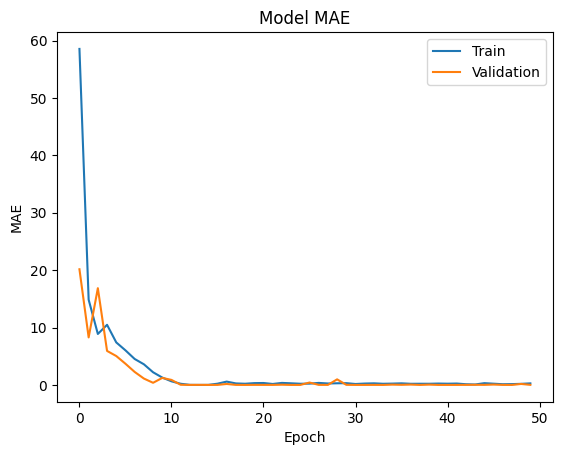

In [85]:
import matplotlib.pyplot as plt

plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

109/109 [==============================] - 0s 1ms/step


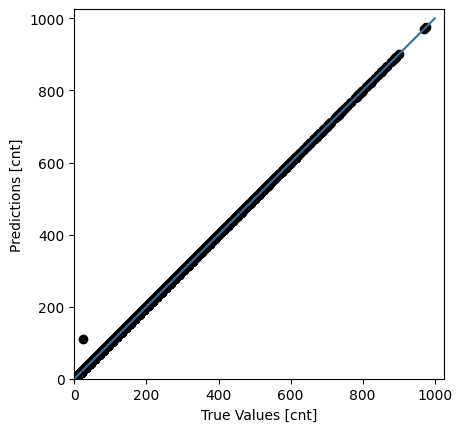

In [86]:
# Make predictions
predictions = model.predict(X_test).flatten()

# Plotting true labels vs predicted labels
plt.scatter(y_test, predictions, color = 'black')
plt.xlabel('True Values [cnt]')
plt.ylabel('Predictions [cnt]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
range = plt.plot([-1000, 1000], [-1000, 1000])

# plt.legend()
plt.show()